In [1]:
import numpy as np
import pytesseract
from PIL import Image
import cv2
from matplotlib import pyplot as plt

# Importing the one of the image files (PNG in this case due to the lossless compression algorithm - we should read directly into Python from PDF though)

image = cv2.imread('../msk_RF1-0.png')


In [3]:
image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [252, 252, 252],
        [252, 252, 252],
        [252, 252, 252]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [252, 252, 252],
        [252, 252, 252],
        [252, 252, 252]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [252, 252, 252],
        [252, 252, 252],
        [252, 252, 252]],

       ...,

       [[252, 252, 252],
        [252, 252, 252],
        [252, 252, 252],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]]

In [4]:

# find lines by horizontally blurring the image and thresholding
blur = cv2.blur(image, (91,9))
b_mean = np.mean(blur, axis=1)/256

In [5]:

# hist, bin_edges = np.histogram(b_mean, bins=100)
# threshold = bin_edges[66]
threshold = np.percentile(b_mean, 66)
t = b_mean > threshold
'''
get the image row numbers that has text (non zero)
a text line is a consecutive group of image rows that 
are above the threshold and are defined by the first and 
last row numbers
'''
tix = np.where(1-t)
tix = tix[0]
lines = []
start_ix = tix[0]
for ix in range(1, tix.shape[0]-1):
    if tix[ix] == tix[ix-1] + 1:
        continue
    # identified gap between lines, close previous line and start a new one
    end_ix = tix[ix-1]
    lines.append([start_ix, end_ix])
    start_ix = tix[ix]
end_ix = tix[-1]
lines.append([start_ix, end_ix])


In [6]:
l_starts = []
for line in lines:
    center_y = int((line[0] + line[1]) / 2)
    xx = 500
    for x in range(0,500):
        col = image[line[0]:line[1], x]
        if np.min(col) < 64:
            xx = x
            break
    l_starts.append(xx)

median_ls = np.median(l_starts)

ValueError: zero-size array to reduction operation minimum which has no identity

In [2]:





paragraphs = []
p_start = lines[0][0]

for ix in range(1, len(lines)):
    if l_starts[ix] > median_ls * 2:
        p_end = lines[ix][0] - 10
        paragraphs.append([p_start, p_end])
        p_start = lines[ix][0]

p_img = np.array(image)
n_cols = p_img.shape[1]
for paragraph in paragraphs:
    cv2.rectangle(p_img, (5, paragraph[0]), (n_cols - 5, paragraph[1]), (128, 128, 0), 5)

cv2.imwrite('paragraphs_out.png', p_img)

ValueError: zero-size array to reduction operation minimum which has no identity

In [3]:

# find lines by horizontally blurring the image and thresholding
blur = cv2.blur(image, (91,9))
b_mean = np.mean(blur, axis=1)/256

# hist, bin_edges = np.histogram(b_mean, bins=100)
# threshold = bin_edges[66]
threshold = np.percentile(b_mean, 66)
t = b_mean > threshold
'''
get the image row numbers that has text (non zero)
a text line is a consecutive group of image rows that 
are above the threshold and are defined by the first and 
last row numbers
'''
tix = np.where(1-t)
tix = tix[0]
lines = []
start_ix = tix[0]
for ix in range(1, tix.shape[0]-1):
    if tix[ix] == tix[ix-1] + 1:
        continue
    # identified gap between lines, close previous line and start a new one
    end_ix = tix[ix-1]
    lines.append([start_ix, end_ix])
    start_ix = tix[ix]
    end_ix = tix[-1]
    lines.append([start_ix, end_ix])


l_starts = []
for line in lines:
    center_y = int((line[0] + line[1]) / 2)
    xx = 500
    for x in range(0,500):
        col = image[line[0]:line[1], x]
        if np.min(col) < 64:
            xx = x
            break
    l_starts.append(xx)

median_ls = np.median(l_starts)



paragraphs = []
p_start = lines[0][0]

for ix in range(1, len(lines)):
    if l_starts[ix] > median_ls * 2:
        p_end = lines[ix][0] - 10
        paragraphs.append([p_start, p_end])
        p_start = lines[ix][0]

p_img = np.array(image)
n_cols = p_img.shape[1]
for paragraph in paragraphs:
    cv2.rectangle(p_img, (5, paragraph[0]), (n_cols - 5, paragraph[1]), (128, 128, 0), 5)

cv2.imwrite('paragraphs_out.png', p_img)

ValueError: zero-size array to reduction operation minimum which has no identity

ValueError: zero-size array to reduction operation minimum which has no identity

In [3]:
image = cv2.imread('paragraphs.png', 0)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [252, 252, 252],
        [252, 252, 252],
        [252, 252, 252]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [252, 252, 252],
        [252, 252, 252],
        [252, 252, 252]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [252, 252, 252],
        [252, 252, 252],
        [252, 252, 252]],

       ...,

       [[252, 252, 252],
        [252, 252, 252],
        [252, 252, 252],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]]

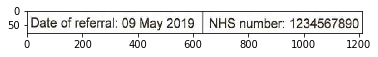

In [2]:
# Manually cutting a couple of fields for testing

y = 950
h = 80
x = 205
w = 1210
date_nhs = image[y:y+h, x:x+w]
plt.imshow(date_nhs)

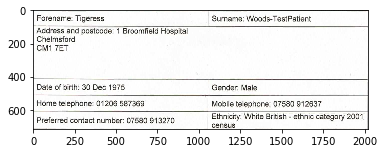

In [4]:
y = 1140
h = 715
x = 195
w = 2020
patient_details = image[y:y+h, x:x+w]
plt.imshow(patient_details)

In [6]:

# We can already detect the test through a quite nice Python OCR

text = pytesseract.image_to_string(date_nhs)

TypeError: Unsupported image format/type

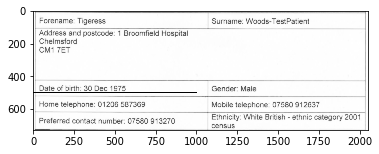

In [7]:





#print(text)

# and 

#text = pytesseract.image_to_string(date_nhs)
#print(date_nhs)

# In order to detect lines in one of the tables, we starth with OpenCV Canny and Hough Transform methods

y = 1130
h = 728
x = 180
w = 2050
patient_details = image[y:y+h, x:x+w]

gray_patient_details = cv2.cvtColor(patient_details, cv2.COLOR_BGR2GRAY) # input image must be grayscale
gray_patient_details = cv2.bilateralFilter(gray_patient_details,9,100,100) # this filter preserves edges and reduces overall noise in the image - better for both the OCR and the line detection

edges = cv2.Canny(gray_patient_details,1,500,apertureSize = 3) # the parameters have to be optimized
lines = cv2.HoughLines(edges,200,np.pi/10, 20) # # the parameters have to be optimized 

# The below for loop runs till r and theta values  
# are in the range of the 2d array 
for r,theta in lines[0]: 
      
    # Stores the value of cos(theta) in a 
    a = np.cos(theta) 
  
    # Stores the value of sin(theta) in b 
    b = np.sin(theta) 
      
    # x0 stores the value rcos(theta) 
    x0 = a*r 
      
    # y0 stores the value rsin(theta) 
    y0 = b*r 
      
    # x1 stores the rounded off value of (rcos(theta)-1000sin(theta)) 
    x1 = int(x0 + 1000*(-b)) 
      
    # y1 stores the rounded off value of (rsin(theta)+1000cos(theta)) 
    y1 = int(y0 + 1000*(a)) 
  
    # x2 stores the rounded off value of (rcos(theta)+1000sin(theta)) 
    x2 = int(x0 - 1000*(-b)) 
      
    # y2 stores the rounded off value of (rsin(theta)-1000cos(theta)) 
    y2 = int(y0 - 1000*(a)) 
      
    # cv2.line draws a line in img from the point(x1,y1) to (x2,y2). 
    # (0,0,255) denotes the colour of the line to be  
    #drawn. In this case, it is red.  
    cv2.line(gray_patient_details,(x1,y1), (x2,y2), (0,0,255),5) 
      
# All the changes made in the input image are finally 
# written on a new image houghlines.jpg 
cv2.imwrite('linesDetected.jpg', gray_patient_details) # I think that there is an issue with plotting here. We should make sure that we fix this in order to be able to 

plt.imshow(gray_patient_details, cmap='Greys_r')